<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
    
<small>
Massimo Nocentini, PhD.
<br><br>
May 2, 2020: init
</small>
</div>
</p>
<br>
<br>
<div align="center">
<b>Abstract</b><br>
    A (very concise) introduction to the <tt>NetworkX</tt> module.
</div>

In [26]:
__AUTHORS__ = {'am': ("Andrea Marino", 
                      "andrea.marino@unifi.it",),
               'mn': ("Massimo Nocentini", 
                      "massimo.nocentini@unifi.it", 
                      "https://github.com/massimo-nocentini/",)}

__KEYWORDS__ = ['Python', 'Jupyter', 'notebooks', 'keynote', 'NetworkX', 'graphs']

<center><img src="https://upload.wikimedia.org/wikipedia/commons/c/c3/Python-logo-notext.svg"></center>

## `NetworkX`

https://github.com/networkx/networkx

Aric A. Hagberg, Daniel A. Schult and Pieter J. Swart, [“Exploring network structure, dynamics, and function using NetworkX”, in Proceedings of the 7th Python in Science Conference (SciPy2008)](http://conference.scipy.org/proceedings/SciPy2008/paper_2/), Gäel Varoquaux, Travis Vaught, and Jarrod Millman (Eds), (Pasadena, CA USA), pp. 11–15, Aug 2008 ([pdf](http://math.lanl.gov/~hagberg/Papers/hagberg-2008-exploring.pdf)).

It is originally downloaded from https://networkx.github.io/documentation/stable/tutorial.html and adapted to be shown as presentation; moreover, we mix in additional resources such as examples (citing them and the original authors) in the last section.

### Creating a graph

Create an empty graph with no nodes and no edges.

In [27]:
import networkx as nx
G = nx.Graph()

By definition, a `Graph` is a collection of nodes (vertices) along with
identified pairs of nodes (called edges, links, etc).  In NetworkX, nodes can
be any hashable object e.g., a text string, an image, an XML object, another
Graph, a customized node object, etc.

>Python's `None` object should not be used as a node as it determines whether optional function arguments have been assigned in many functions.

# Nodes

The graph `G` can be grown in several ways.  NetworkX includes many graph
generator functions and facilities to read and write graphs in many formats.
To get started though we’ll look at simple manipulations.  You can add one node
at a time,

In [28]:
G.add_node(1)

add a list of nodes,

In [29]:
G.add_nodes_from([2, 3])

or add any iterable container of nodes. You can also add nodes along with node
attributes if your container yields 2-tuples (node, node_attribute_dict).
Node attributes are discussed further below.

In [30]:
H = nx.path_graph(10)
G.add_nodes_from(H)

Note that `G` now contains the nodes of `H` as nodes of `G`.
In contrast, you could use the graph `H` as a node in `G`.

In [31]:
G.add_node(H)

The graph `G` now contains `H` as a node.  This flexibility is very powerful as
it allows graphs of graphs, graphs of files, graphs of functions and much more.
It is worth thinking about how to structure your application so that the nodes
are useful entities.  Of course you can always use a unique identifier in `G`
and have a separate dictionary keyed by identifier to the node information if
you prefer.



# Edges

`G` can also be grown by adding one edge at a time,

In [32]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

by adding a list of edges,

In [33]:
G.add_edges_from([(1, 2), (1, 3)])

or by adding any ebunch of edges.  An *ebunch* is any iterable
container of edge-tuples.  An edge-tuple can be a 2-tuple of nodes or a 3-tuple
with 2 nodes followed by an edge attribute dictionary, e.g.,
`(2, 3, {'weight': 3.1415})`.  Edge attributes are discussed further below

In [34]:
G.add_edges_from(H.edges)

There are no complaints when adding existing nodes or edges. For example,
after removing all nodes and edges,

In [35]:
G.clear()

we add new nodes/edges and NetworkX quietly ignores any that are
already present.

In [36]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

At this stage the graph `G` consists of 8 nodes and 3 edges, as can be seen by:

In [37]:
G.number_of_nodes()

8

In [38]:
G.number_of_edges()

3

We can examine the nodes and edges. Four basic graph properties facilitate
reporting: `G.nodes`, `G.edges`, `G.adj` and `G.degree`.  These
are set-like views of the nodes, edges, neighbors (adjacencies), and degrees
of nodes in a graph. They offer a continually updated read-only view into
the graph structure. They are also dict-like in that you can look up node
and edge data attributes via the views and iterate with data attributes
using methods `.items()`, `.data('span')`.
If you want a specific container type instead of a view, you can specify one.
Here we use lists, though sets, dicts, tuples and other containers may be
better in other contexts.

In [39]:
list(G.nodes)

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

In [40]:
list(G.edges)

[(1, 2), (1, 3), (3, 'm')]

In [41]:
list(G.adj[1])  # or list(G.neighbors(1))

[2, 3]

In [42]:

G.degree[1]  # the number of edges incident to 1

2

One can specify to report the edges and degree from a subset of all nodes
using an *nbunch*. An *nbunch* is any of: None (meaning all nodes), a node,
or an iterable container of nodes that is not itself a node in the graph.

In [43]:
G.edges([2, 'm']), G.degree([2, 3])

(EdgeDataView([(2, 1), ('m', 3)]), DegreeView({2: 1, 3: 2}))

One can remove nodes and edges from the graph in a similar fashion to adding.
Use methods
`Graph.remove_node()`,
`Graph.remove_nodes_from()`,
`Graph.remove_edge()`
and
`Graph.remove_edges_from()`, e.g.

In [44]:
G.remove_node(2)
G.remove_nodes_from("spam")
list(G.nodes)

[1, 3, 'spam']

In [45]:
G.remove_edge(1, 3)

When creating a graph structure by instantiating one of the graph
classes you can specify data in several formats.

In [46]:
G.add_edge(1, 2)
H = nx.DiGraph(G)   # create a DiGraph using the connections from G
list(H.edges())

[(1, 2), (2, 1)]

In [47]:
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)

# What to use as nodes and edges

You might notice that nodes and edges are not specified as NetworkX
objects.  This leaves you free to use meaningful items as nodes and
edges. The most common choices are numbers or strings, but a node can
be any hashable object (except `None`), and an edge can be associated
with any object `x` using `G.add_edge(n1, n2, object=x)`.

As an example, `n1` and `n2` could be protein objects from the RCSB Protein
Data Bank, and `x` could refer to an XML record of publications detailing
experimental observations of their interaction.

We have found this power quite useful, but its abuse
can lead to unexpected surprises unless one is familiar with Python.
If in doubt, consider using `convert_node_labels_to_integers()` to obtain
a more traditional graph with integer labels.



# Accessing edges and neighbors

In addition to the views `Graph.edges()`, and `Graph.adj()`,
access to edges and neighbors is possible using subscript notation.

In [48]:
G[1]  # same as G.adj[1]

AtlasView({2: {}})

In [49]:
G[1][2], G.edges[1, 2]

({}, {})

You can get/set the attributes of an edge using subscript notation
if the edge already exists.

In [50]:
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"

Fast examination of all (node, adjacency) pairs is achieved using
`G.adjacency()`, or `G.adj.items()`.
Note that for undirected graphs, adjacency iteration sees each edge twice.

In [51]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
   for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       if wt < 0.5: print('(%d, %d, %.3f)' % (n, nbr, wt))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


Convenient access to all edges is achieved with the edges property.

In [52]:
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5: print('(%d, %d, %.3f)' % (u, v, wt))

(1, 2, 0.125)
(3, 4, 0.375)


# Adding attributes to graphs, nodes, and edges

Attributes such as weights, labels, colors, or whatever Python object you like,
can be attached to graphs, nodes, or edges.

Each graph, node, and edge can hold key/value attribute pairs in an associated
attribute dictionary (the keys must be hashable).  By default these are empty,
but attributes can be added or changed using `add_edge`, `add_node` or direct
manipulation of the attribute dictionaries named `G.graph`, `G.nodes`, and
`G.edges` for a graph `G`.

## Graph attributes

Assign graph attributes when creating a new graph

In [53]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

Or you can modify attributes later

In [54]:
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

# Node attributes

Add node attributes using `add_node()`, `add_nodes_from()`, or `G.nodes`

In [55]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]

{'time': '5pm'}

In [56]:
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

Note that adding a node to `G.nodes` does not add it to the graph, use
`G.add_node()` to add new nodes. Similarly for edges.

# Edge Attributes

Add/change edge attributes using `add_edge()`, `add_edges_from()`,
or subscript notation.

In [57]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

The special attribute `weight` should be numeric as it is used by
algorithms requiring weighted edges.

 Directed graphs

The `DiGraph` class provides additional properties specific to
directed edges, e.g.,
`DiGraph.out_edges()`, `DiGraph.in_degree()`,
`DiGraph.predecessors()`, `DiGraph.successors()` etc.
To allow algorithms to work with both classes easily, the directed versions of
`neighbors()` is equivalent to `successors()` while `degree` reports
the sum of `in_degree` and `out_degree` even though that may feel
inconsistent at times.

In [60]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight'), DG.degree(1, weight='weight')

(0.5, 1.25)

In [61]:
list(DG.successors(1)), list(DG.neighbors(1))

([2], [2])

Some algorithms work only for directed graphs and others are not well
defined for directed graphs.  Indeed the tendency to lump directed
and undirected graphs together is dangerous.  If you want to treat
a directed graph as undirected for some measurement you should probably
convert it using `Graph.to_undirected()` or with

In [62]:
H = nx.Graph(G)  # convert G to undirected graph

# Multigraphs

NetworkX provides classes for graphs which allow multiple edges
between any pair of nodes.  The `MultiGraph` and
`MultiDiGraph`
classes allow you to add the same edge twice, possibly with different
edge data.  This can be powerful for some applications, but many
algorithms are not well defined on such graphs.
Where results are well defined,
e.g., `MultiGraph.degree()` we provide the function.  Otherwise you
should convert to a standard graph in a way that makes the measurement
well defined.

In [63]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight'))

{1: 1.25, 2: 1.75, 3: 0.5}

In [65]:
GG = nx.Graph()
for n, nbrs in MG.adjacency():
   for nbr, edict in nbrs.items():
       minvalue = min([d['weight'] for d in edict.values()])
       GG.add_edge(n, nbr, weight = minvalue)

nx.shortest_path(GG, 1, 3)

[1, 2, 3]

# Graph generators and graph operations

In addition to constructing graphs node-by-node or edge-by-edge, they
can also be generated by

1. Applying classic graph operations, such as:

   ```
   subgraph(G, nbunch)      - induced subgraph view of G on nodes in nbunch
   union(G1,G2)             - graph union
   disjoint_union(G1,G2)    - graph union assuming all nodes are different
   cartesian_product(G1,G2) - return Cartesian product graph
   compose(G1,G2)           - combine graphs identifying nodes common to both
   complement(G)            - graph complement
   create_empty_copy(G)     - return an empty copy of the same graph class
   to_undirected(G) - return an undirected representation of G
   to_directed(G)   - return a directed representation of G
   ```

1. Using a call to one of the classic small graphs, e.g.,

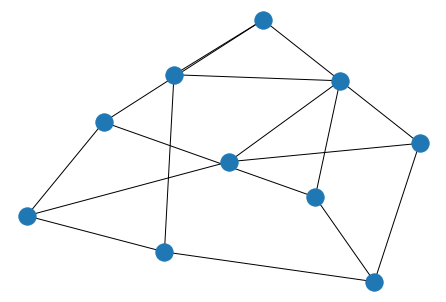

In [91]:
petersen = nx.petersen_graph()
nx.draw(petersen)

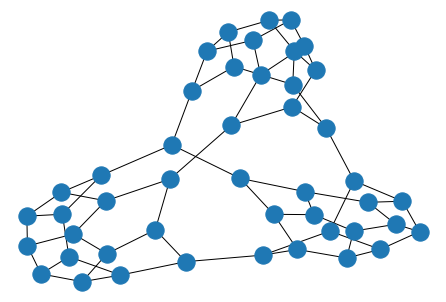

In [92]:
tutte = nx.tutte_graph()
nx.draw(tutte)

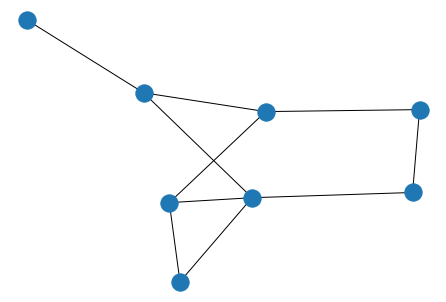

In [93]:
maze = nx.sedgewick_maze_graph()
nx.draw(maze)

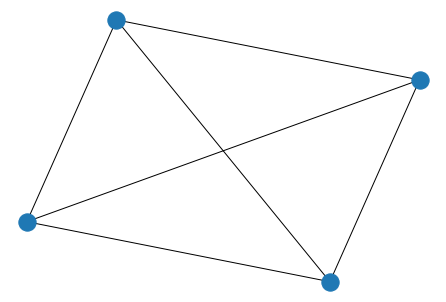

In [97]:
tet = nx.tetrahedral_graph()
nx.draw(tet)

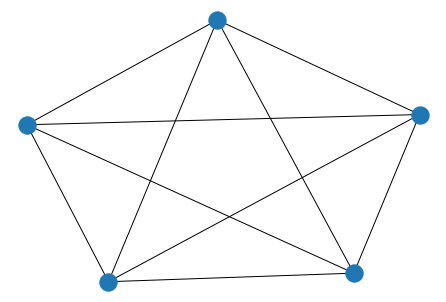

In [98]:
K_5 = nx.complete_graph(5)
nx.draw(K_5)

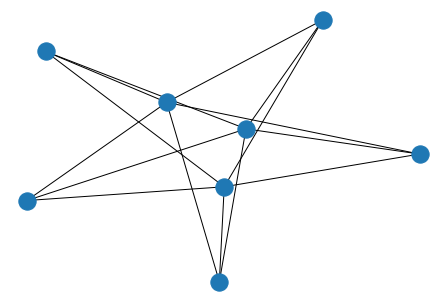

In [99]:
K_3_5 = nx.complete_bipartite_graph(3, 5)
nx.draw(K_3_5)

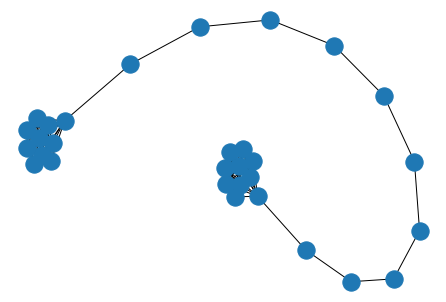

In [100]:
barbell = nx.barbell_graph(10, 10)
nx.draw(barbell)

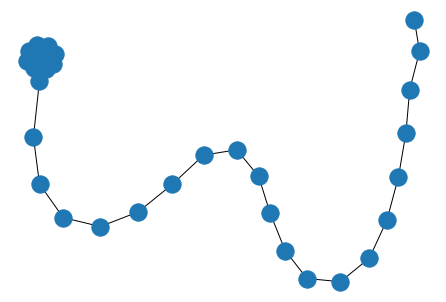

In [101]:
lollipop = nx.lollipop_graph(10, 20)
nx.draw(lollipop)

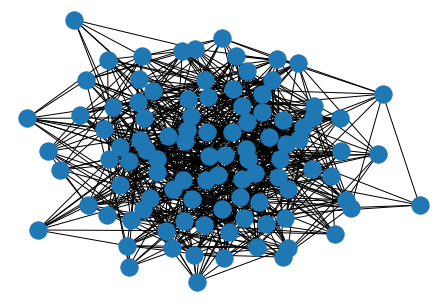

In [102]:
er = nx.erdos_renyi_graph(100, 0.15)
nx.draw(er)

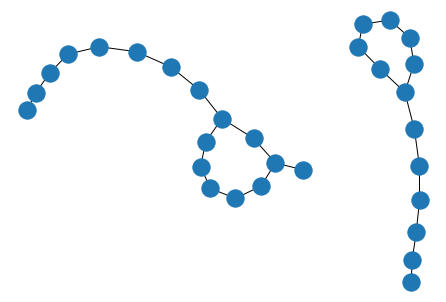

In [103]:
ws = nx.watts_strogatz_graph(30, 3, 0.1)
nx.draw(ws)

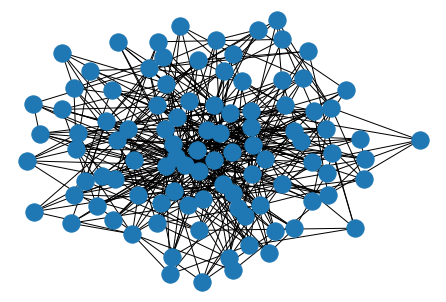

In [104]:
ba = nx.barabasi_albert_graph(100, 5)
nx.draw(ba)

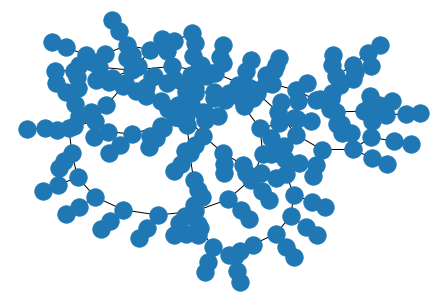

In [105]:
red = nx.random_lobster(100, 0.9, 0.9)
nx.draw(red)

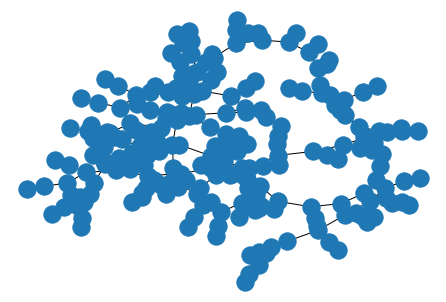

In [107]:
nx.write_gml(red, "path.to.file")
mygraph = nx.read_gml("path.to.file")
nx.draw(mygraph)

# Analyzing graphs

The structure of `G` can be analyzed using various graph-theoretic
functions such as:

In [70]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")       # adds node "spam"
list(nx.connected_components(G))

[{1, 2, 3}, {'spam'}]

In [71]:
sorted(d for n, d in G.degree())

[0, 1, 1, 2]

In [73]:
nx.clustering(G)

{1: 0, 2: 0, 3: 0, 'spam': 0}

Some functions with large output iterate over (node, value) 2-tuples.
These are easily stored in a [dict](https://docs.python.org/2/library/stdtypes.html#dict) structure if you desire.

In [ ]:
sp = dict(nx.all_pairs_shortest_path(G))
sp[3]

See [Algorithms](https://networkx.github.io/documentation/stable/reference/algorithms/index.html) for details on graph algorithms supported.

# Drawing graphs

NetworkX is not primarily a graph drawing package but basic drawing with
Matplotlib as well as an interface to use the open source Graphviz software
package are included.  These are part of the `networkx.drawing` module and will
be imported if possible.

First import Matplotlib’s plot interface (pylab works too)

In [74]:
import matplotlib.pyplot as plt

You may find it useful to interactively test code using `ipython -pylab`,
which combines the power of ipython and matplotlib and provides a convenient
interactive mode.

To test if the import of `networkx.drawing` was successful draw `G` using one of

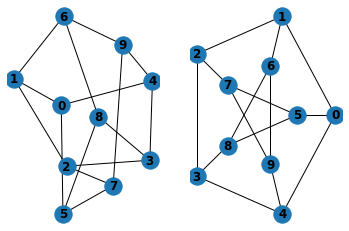

In [75]:
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

when drawing to an interactive display.  Note that you may need to issue a
Matplotlib

In [76]:
plt.show()

command if you are not using matplotlib in interactive mode (see
[Matplotlib FAQ](http://matplotlib.org/faq/installing_faq.html#matplotlib-compiled-fine-but-nothing-shows-up-when-i-use-it)
).

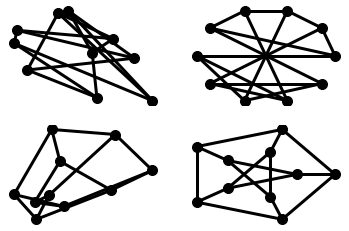

In [77]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
plt.subplot(221)
nx.draw_random(G, **options)
plt.subplot(222)
nx.draw_circular(G, **options)
plt.subplot(223)
nx.draw_spectral(G, **options)
plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

You can find additional options via `draw_networkx()` and
layouts via `layout`.
You can use multiple shells with `draw_shell()`.

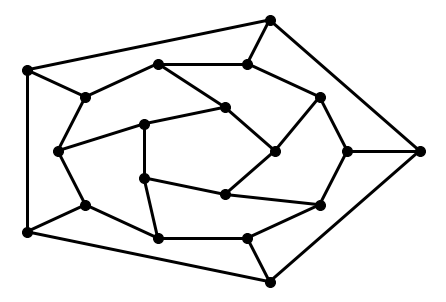

In [78]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

To save drawings to a file, use, for example

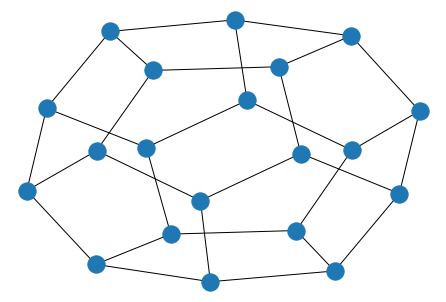

In [79]:
nx.draw(G)
plt.savefig("path.png")

writes to the file `path.png` in the local directory. If Graphviz and
PyGraphviz or pydot, are available on your system, you can also use
`nx_agraph.graphviz_layout(G)` or `nx_pydot.graphviz_layout(G)` to get the
node positions, or write the graph in dot format for further processing.

In [80]:
from networkx.drawing.nx_pydot import write_dot
pos = nx.nx_agraph.graphviz_layout(G)
nx.draw(G, pos=pos)
write_dot(G, 'file.dot')

ImportError: ('requires pygraphviz ', 'http://pygraphviz.github.io/')

See Drawing for additional details.

# Examples

A complete gallery of examples can be found at https://networkx.github.io/documentation/stable/auto_examples/index.html

https://networkx.github.io/documentation/stable/auto_examples/basic/plot_read_write.html#sphx-glr-auto-examples-basic-plot-read-write-py

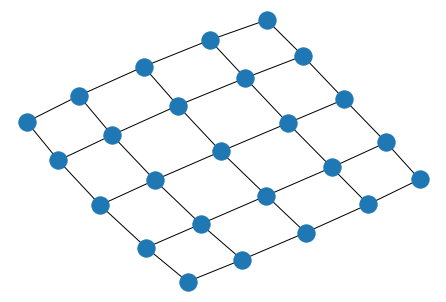

In [83]:
# Author: Aric Hagberg (hagberg@lanl.gov)
G = nx.grid_2d_graph(5, 5)  # 5x5 grid

# print the adjacency list
#for line in nx.generate_adjlist(G):
#    print(line)

# write edgelist to grid.edgelist
nx.write_edgelist(G, path="grid.edgelist", delimiter=":")
# read edgelist from grid.edgelist
H = nx.read_edgelist(path="grid.edgelist", delimiter=":")

nx.draw(H)
plt.show()

https://networkx.github.io/documentation/stable/auto_examples/basic/plot_properties.html#sphx-glr-auto-examples-basic-plot-properties-py

In [84]:
G = nx.lollipop_graph(4, 6)

pathlengths = []

print("source vertex {target:length, }")
for v in G.nodes():
    spl = dict(nx.single_source_shortest_path_length(G, v))
    print('{} {} '.format(v, spl))
    for p in spl:
        pathlengths.append(spl[p])

print('')
print("average shortest path length %s" % (sum(pathlengths) / len(pathlengths)))

source vertex {target:length, }
0 {0: 0, 1: 1, 2: 1, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7} 
1 {1: 0, 0: 1, 2: 1, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7} 
2 {2: 0, 0: 1, 1: 1, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7} 
3 {3: 0, 0: 1, 1: 1, 2: 1, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6} 
4 {4: 0, 5: 1, 3: 1, 6: 2, 0: 2, 1: 2, 2: 2, 7: 3, 8: 4, 9: 5} 
5 {5: 0, 4: 1, 6: 1, 3: 2, 7: 2, 0: 3, 1: 3, 2: 3, 8: 3, 9: 4} 
6 {6: 0, 5: 1, 7: 1, 4: 2, 8: 2, 3: 3, 9: 3, 0: 4, 1: 4, 2: 4} 
7 {7: 0, 6: 1, 8: 1, 5: 2, 9: 2, 4: 3, 3: 4, 0: 5, 1: 5, 2: 5} 
8 {8: 0, 7: 1, 9: 1, 6: 2, 5: 3, 4: 4, 3: 5, 0: 6, 1: 6, 2: 6} 
9 {9: 0, 8: 1, 7: 2, 6: 3, 5: 4, 4: 5, 3: 6, 0: 7, 1: 7, 2: 7} 

average shortest path length 2.86


In [87]:
# histogram of path lengths
dist = {}
for p in pathlengths:
    if p in dist:
        dist[p] += 1
    else:
        dist[p] = 1

print('')
print("length #paths")
verts = dist.keys()
for d in sorted(verts):
    print('%s %d' % (d, dist[d]))


length #paths
0 10
1 24
2 16
3 14
4 12
5 10
6 8
7 6


In [88]:
print("radius: %d" % nx.radius(G))
print("diameter: %d" % nx.diameter(G))
print("eccentricity: %s" % nx.eccentricity(G))
print("center: %s" % nx.center(G))
print("periphery: %s" % nx.periphery(G))
print("density: %s" % nx.density(G))

radius: 4
diameter: 7
eccentricity: {0: 7, 1: 7, 2: 7, 3: 6, 4: 5, 5: 4, 6: 4, 7: 5, 8: 6, 9: 7}
center: [5, 6]
periphery: [0, 1, 2, 9]
density: 0.26666666666666666


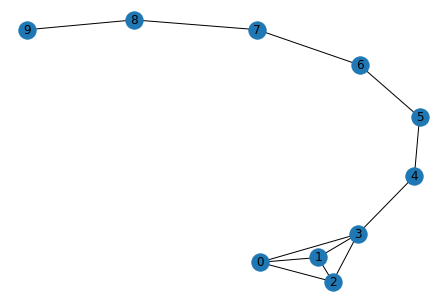

In [86]:
nx.draw(G, with_labels=True)
plt.show()

https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_node_colormap.html#sphx-glr-auto-examples-drawing-plot-node-colormap-py

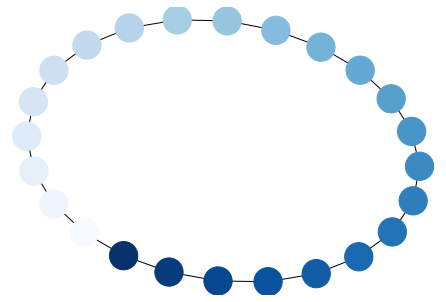

In [108]:
# Author: Aric Hagberg (hagberg@lanl.gov)
G = nx.cycle_graph(24)
pos = nx.spring_layout(G, iterations=200)
nx.draw(G, pos, node_color=range(24), node_size=800, cmap=plt.cm.Blues)
plt.show()

https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_edge_colormap.html#sphx-glr-auto-examples-drawing-plot-edge-colormap-py

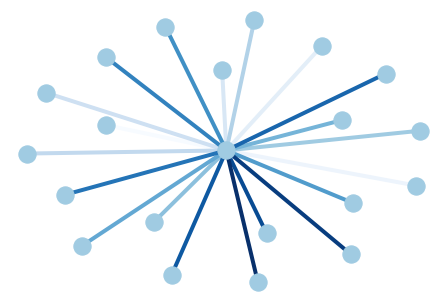

In [109]:
# Author: Aric Hagberg (hagberg@lanl.gov)
G = nx.star_graph(20)
pos = nx.spring_layout(G)
colors = range(20)
nx.draw(G, pos, node_color='#A0CBE2', edge_color=colors,
        width=4, edge_cmap=plt.cm.Blues, with_labels=False)
plt.show()

https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_spectral_grid.html#sphx-glr-auto-examples-drawing-plot-spectral-grid-py

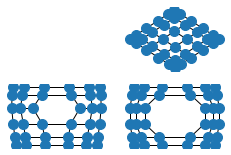

In [113]:
options = {
    'node_color': 'C0',
    'node_size': 100,
}

G = nx.grid_2d_graph(6, 6)
plt.subplot(332)
nx.draw_spectral(G, **options)

G.remove_edge((2, 2), (2, 3))
plt.subplot(334)
nx.draw_spectral(G, **options)

G.remove_edge((3, 2), (3, 3))
plt.subplot(335)
nx.draw_spectral(G, **options)


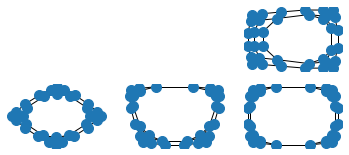

In [114]:

G.remove_edge((2, 2), (3, 2))
plt.subplot(336)
nx.draw_spectral(G, **options)

G.remove_edge((2, 3), (3, 3))
plt.subplot(337)
nx.draw_spectral(G, **options)

G.remove_edge((1, 2), (1, 3))
plt.subplot(338)
nx.draw_spectral(G, **options)

G.remove_edge((4, 2), (4, 3))
plt.subplot(339)
nx.draw_spectral(G, **options)

https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_directed.html#sphx-glr-auto-examples-drawing-plot-directed-py

In [121]:
# Author: Rodrigo Dorantes-Gilardi (rodgdor@gmail.com)

import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

G = nx.generators.directed.random_k_out_graph(10, 3, 0.5)
pos = nx.layout.spring_layout(G)

node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

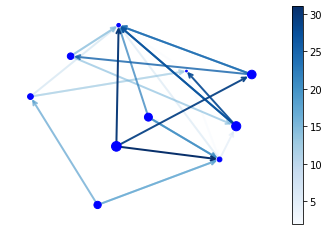

In [122]:

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='blue')
edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, arrowstyle='->',
                               arrowsize=10, edge_color=edge_colors,
                               edge_cmap=plt.cm.Blues, width=2)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.Blues)
pc.set_array(edge_colors)
plt.colorbar(pc)

ax = plt.gca()
ax.set_axis_off()
plt.show()

https://networkx.github.io/documentation/stable/auto_examples/graph/plot_roget.html#sphx-glr-auto-examples-graph-plot-roget-py

In [127]:
# Authors: Brendt Wohlberg, Aric Hagberg (hagberg@lanl.gov)

import gzip
import re
import sys

import matplotlib.pyplot as plt
from networkx import nx

def roget_graph():
    """ Return the thesaurus graph from the roget.dat example in
    the Stanford Graph Base.
    """
    # open file roget_dat.txt.gz (or roget_dat.txt)
    fh = gzip.open('roget_dat.txt.gz', 'r')

    G = nx.DiGraph()

    for line in fh.readlines():
        line = line.decode()
        if line.startswith("*"):  # skip comments
            continue
        if line.startswith(" "):  # this is a continuation line, append
            line = oldline + line
        if line.endswith("\\\n"):  # continuation line, buffer, goto next
            oldline = line.strip("\\\n")
            continue

        (headname, tails) = line.split(":")

        # head
        numfind = re.compile("^\d+")  # re to find the number of this word
        head = numfind.findall(headname)[0]  # get the number

        G.add_node(head)

        for tail in tails.split():
            if head == tail:
                print("skipping self loop", head, tail, file=sys.stderr)
            G.add_edge(head, tail)

    return G

skipping self loop 400 400


Loaded roget_dat.txt containing 1022 categories.
digraph has 1022 nodes with 5075 edges
21 connected components


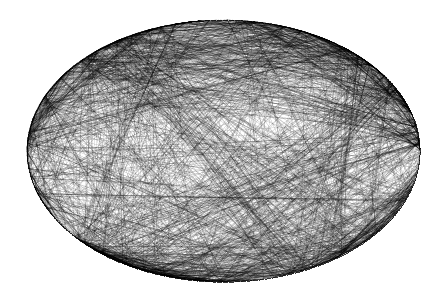

In [129]:
G = roget_graph()
print("Loaded roget_dat.txt containing 1022 categories.")
print("digraph has %d nodes with %d edges"
      % (nx.number_of_nodes(G), nx.number_of_edges(G)))
UG = G.to_undirected()
print(nx.number_connected_components(UG), "connected components")

options = {
    'node_color': 'black',
    'node_size': 1,
    'line_color': 'grey',
    'linewidths': 0,
    'width': 0.1,
}
nx.draw_circular(UG, **options)
plt.show()